In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Title: Alcohol Consumption and Regions: An Investigation

Intro

Alcohol consumption is oftentimes involved in activities as a form of bonding and to facilitate socialization, moreover, it can be a part of one's culture. For example, there are "wet cultures" where alcohol is common in everyday life, which are in European countries around the Mediterranean and "consumed with meals", with lower rates of abstinence. Or, there are "dry cultures" where alcohol is uncommon with higher rates of abstinence, such as Canada(Bloomfield et al., 2003). The differences of alcohol in countries have been showed in studies previously. For example, a study found that German respondents had an alcohol consumption that was twice as high as US respondents (Bloomfield et al., 2003)

It is important to note that excessive consumption of alcohol is linked to many negative health outcomes. It may lead to crimes, road incidents, diseases and health impacts (Ritchie et al., 2018). Alcohol can cause addiction, and after drinking alcohol the effects can persist for hours (Babor et al., 2010). A European longitudinal study also demonstrated that job loss had a positive association with hazardous drinking over the span of 6 years (Bosque-Prous et al., 2015). Thus, one can see the substantial impacts of alcohol consumption on populations.

Our analysis uses data, "Happiness and Alcohol Consumption" found on Kaggle.com and will seek to answer the following question: What regions would have a certain alcohol consumption (beer, wine and spirit per capita)?  In this analysis, this expansive dataset was collected by Marcos Pessotto. In our dataset, we will be using the variables: “Region”, “Beer_PerCapita” and “Wine_PerCapita”. For our project, we hypothesize that the higher the beer and wine consumption per capita, it will most likely to be located on the Western Europe region as Western Europe regions borders the Mediterranean, where "wet culture" is prevalent(Bloomfield et al., 2003). 

To begin analyzing our data, we first loaded in all the packages we needed using the 'library' function.
Our dataset is taken from Kaggle. 

First, we had to download the dataset from the web onto the computer. Second, we uploaded the file into the juypter directory we are working in.
Next, we set the seed to ensure that the sequence of numbers that is randomly generated is reproducible and we read in the data using the 'read_csv' function with a relative pathway. Below is the data that was read. 

In [2]:
set.seed(20)

url <- "https://drive.google.com/uc?export=download&id=1jjBVsxq8p2lxJlHJ37QiwPDmb-sK_V6L"

alcohol_data <- read.csv(url)

alcohol_data

Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
Denmark,Western Europe,north,7.526,928,53.579,224,81,278
Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
Iceland,Western Europe,north,7.501,933,60.530,233,61,78
Norway,Western Europe,north,7.498,951,70.890,169,71,129
Finland,Western Europe,north,7.413,918,43.433,263,133,97
Canada,North America,north,7.404,922,42.349,240,122,100
Netherlands,Western Europe,north,7.339,928,45.638,251,88,190
New Zealand,Australia and New Zealand,south,7.334,915,40.332,203,79,175
Australia,Australia and New Zealand,south,7.313,938,49.897,261,72,212


Doing a quick analysis of the data reveals that there are 9 variables. The dataset is pretty tidy - each row is one observation - an observation of one specific country and its region, and its respective elements such as HappinessScore, HDI, GDP per capita etc. 
For our specific question, we did not need to consider all the columns in this dataset, so we selected region, Beer_PerCapita and Wine_PerCapita.

We grouped the dataset by region to tell which regions there are for when plotting it in the graph, as we want to colour by regions and label which regions there are.

In [3]:
data_grouped <- alcohol_data %>%
                group_by(Region) %>%
                summarize(n = n())
data_grouped

`summarise()` ungrouping output (override with `.groups` argument)



Region,n
<chr>,<int>
Australia and New Zealand,2
Central and Eastern Europe,27
Eastern Asia,4
Latin America and Caribbean,23
Middle East and Northern Africa,11
North America,2
Southeastern Asia,5
Sub-Saharan Africa,28
Western Europe,20


We combined the smaller groups like Asias and Australias, and eliminated North Americas and Middle East and Northern Africa out as they were only a few observations. 

In [4]:
Region_asia <- alcohol_data %>%
            filter(Region == "Southeastern Asia" | Region == "Eastern Asia" | Region == "Australia and New Zealand") %>%
            rowwise() %>%
            mutate(Region = "Asia and Australia")

alcohol_data_filtered <- alcohol_data %>%
            filter(Region == "Sub-Saharan Africa"| Region == "Latin America and Caribbean"|
                 Region == "Western Europe" | Region ==  "Central and Eastern Europe")



alcohol_data_good <- full_join(Region_asia, alcohol_data_filtered)

alcohol_data_good


alcohol_data_count <-alcohol_data_good %>%
                    group_by(Region) %>%
                    summarize(n = n())

alcohol_data_count




            

Joining, by = c("Country", "Region", "Hemisphere", "HappinessScore", "HDI", "GDP_PerCapita", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita")



Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
New Zealand,Asia and Australia,south,7.334,915,40.332,203,79,175
Australia,Asia and Australia,south,7.313,938,49.897,261,72,212
Singapore,Asia and Australia,north,6.739,930,55.243,60,12,11
Thailand,Asia and Australia,north,6.474,748,5.979,99,258,1
Japan,Asia and Australia,noth,5.921,907,38.972,77,202,16
South Korea,Asia and Australia,noth,5.835,900,27.105,140,16,9
Philippines,Asia and Australia,north,5.279,696,2.951,71,186,1
China,Asia and Australia,noth,5.245,748,8.117,79,192,8
Vietnam,Asia and Australia,north,5.061,689,2.171,111,2,1


`summarise()` ungrouping output (override with `.groups` argument)



Region,n
<chr>,<int>
Asia and Australia,11
Central and Eastern Europe,27
Latin America and Caribbean,23
Sub-Saharan Africa,28
Western Europe,20


And then we selected the columns that we would be using for our predictors as well as the target variable.

In [5]:
data_selected2 <- alcohol_data_good %>%
                 select(Region, Beer_PerCapita, Wine_PerCapita, Spirit_PerCapita)

data_selected2

Region,Beer_PerCapita,Wine_PerCapita,Spirit_PerCapita
<chr>,<int>,<int>,<int>
Asia and Australia,203,175,79
Asia and Australia,261,212,72
Asia and Australia,60,11,12
Asia and Australia,99,1,258
Asia and Australia,77,16,202
Asia and Australia,140,9,16
Asia and Australia,71,1,186
Asia and Australia,79,8,192
Asia and Australia,111,1,2


Now we split our data into 75% and 25% in order to extract the training and testing data into two separate frames, and we show the training dataset below.

In [6]:
alcoholdata_split<- initial_split(data_selected2, prop = 0.75, strata = Region)
alcohol_train <- training(alcoholdata_split)
alcohol_test <- testing(alcoholdata_split)


We then grouped the regions and showed the number of observations of each region.

In [7]:
data_summary <- alcohol_train %>%
            group_by(Region) %>%
            summarize(n = n())
data_summary

`summarise()` ungrouping output (override with `.groups` argument)



Region,n
<chr>,<int>
Asia and Australia,9
Central and Eastern Europe,21
Latin America and Caribbean,18
Sub-Saharan Africa,21
Western Europe,15


The bar graph below shows a visualization of this table.

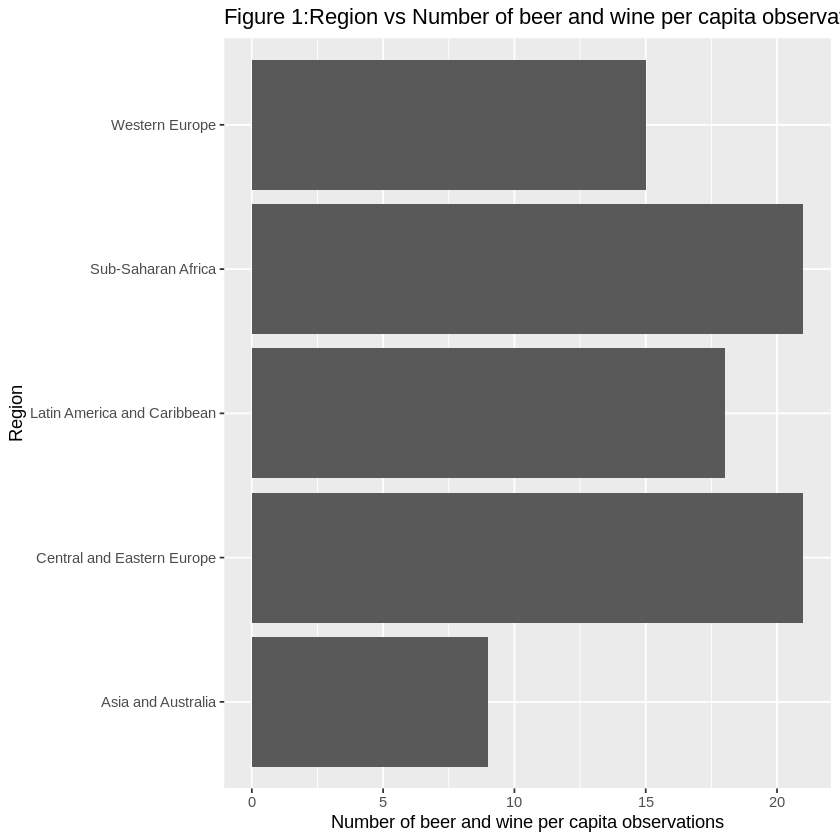

In [8]:
data_summary_graph <- data_summary %>%
                    ggplot(aes(x = n, y = Region)) + 
                    geom_bar(stat = "identity") + 
                    xlab("Number of beer and wine per capita observations") + 
                    ylab("Region") + 
                    ggtitle("Figure 1:Region vs Number of beer and wine per capita observations")


data_summary_graph

We will now use R to perform cross validation and choose the best K, and we will create a recipe for preprocessing data, and a model specification for K-nearest neighbors regression.  

In [9]:
alco_tr_recipe <- recipe(Region ~ Beer_PerCapita + Wine_PerCapita + Spirit_PerCapita, data = alcohol_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

alco_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                set_engine("kknn") %>%
                set_mode("classification")



We performed cross validation split

In [17]:
alcohol_vfold <- vfold_cv(alcohol_train, v = 9, strata = Region)

Now we put everything in a workflow and we initially were planning to use 1 to 100 for the number of neighbours but we realized that we have 84 observations in total so we set the neighbours to 30 and we decided to use 10 fo

In [18]:
alco_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 5))


data_results <- workflow() %>%
                add_recipe(alco_tr_recipe) %>%
                add_model(alco_spec)%>%
                tune_grid(resamples = alcohol_vfold, grid = alco_vals) %>%
                collect_metrics()

data_accuracies <- data_results %>%
                filter(.metric == "accuracy")

data_accuracies


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5592031,9,0.03322281,Model1
6,accuracy,multiclass,0.6003086,9,0.04088134,Model2
11,accuracy,multiclass,0.6018519,9,0.03996821,Model3
16,accuracy,multiclass,0.6056397,9,0.04112321,Model4
21,accuracy,multiclass,0.5879630,9,0.04846102,Model5
26,accuracy,multiclass,0.5864198,9,0.04554123,Model6


Now we will plot data_accuracies to find the best K value 

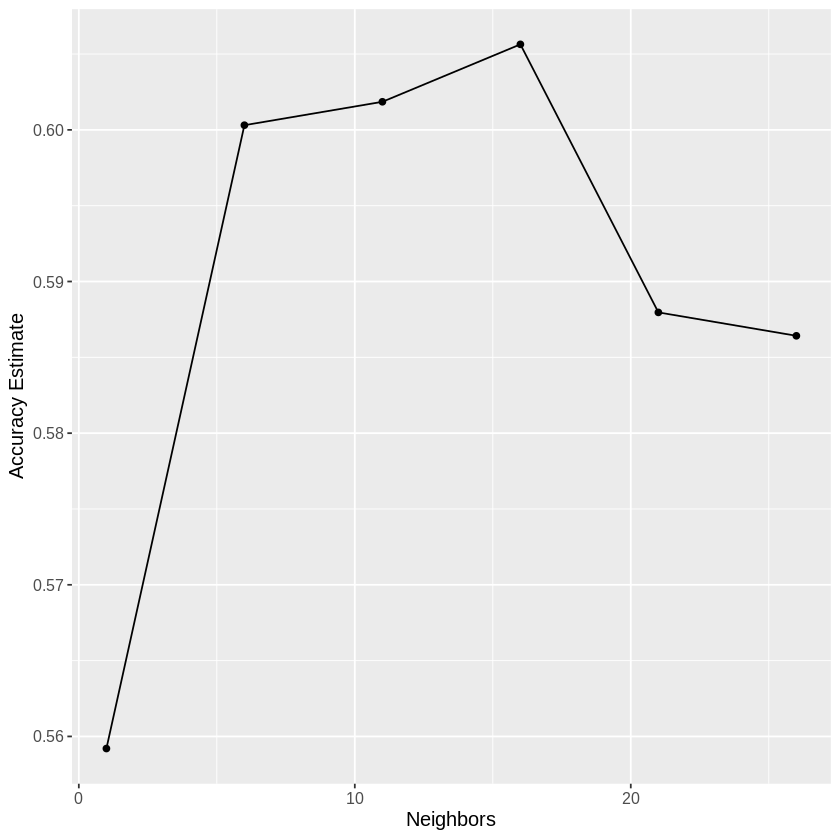

In [19]:
accuracy_vs_k <- ggplot(data_accuracies, aes(x = neighbors, y = mean)) + 
                geom_point() + 
                geom_line() + 
                labs(x = "Neighbors", y = "Accuracy Estimate") + 
                theme(text = element_text(size = 12))

accuracy_vs_k

From the graph we have determined the optimal K to be 16.